<a href="https://colab.research.google.com/github/Ravi10048/Index-of-Depression/blob/main/depression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip install Pandas-Profiling
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [18]:
# Load the data from CSV file
data = pd.read_csv('depression.csv')
print(data.dtypes)
# Report=ProfileReport(data)
# Report.to_file("indian_people_dataset.html")


Name                         object
Age                           int64
Gender                       object
Sadness                       int64
Loss of interest              int64
Sleep disturbances            int64
Appetite changes              int64
Hopelessness                  int64
Stressful life events         int64
Family history               object
Social support                int64
Physical health problems      int64
Substance use                object
Medications                  object
Anxiety symptoms              int64
Suicidal ideation            object
Treatment history            object
Trauma history               object
Financial stress              int64
Cultural factors             object
Genetic Predisposition      float64
Level of depression         float64
dtype: object


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:

print(data.head())
print(data.info())

    Name  Age  Gender  Sadness  Loss of interest  Sleep disturbances  \
0   Amit   28    Male        3                 2                   3   
1   Riya   23  Female        1                 1                   1   
2  Karan   25    Male        4                 4                   4   
3  Aditi   22  Female        2                 3                   2   
4  Rahul   27    Male        3                 3                   3   

   Appetite changes  Hopelessness  Stressful life events Family history  ...  \
0                 3             2                      2            Yes  ...   
1                 1             1                      1             No  ...   
2                 4             4                      1            Yes  ...   
3                 3             1                      3             No  ...   
4                 3             3                      1             No  ...   

   Substance use  Medications Anxiety symptoms Suicidal ideation  \
0             No  

In [9]:

data['Level of depression']=data['Level of depression'].fillna(np.random.randint(1,6))

# encoding "Gender" Column
data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

# encoding "Family history" Column
data.replace({'Family history':{'No':0,'Yes':1}},inplace=True)

# encoding "Substance use" Column
data.replace({'Substance use':{'No':0,'Yes':1}},inplace=True)

#encoding "Medications" Column
data.replace({'Medications':{'No':0,'Yes':1}},inplace=True)

#encoding "Suicidal ideation" Column
data.replace({'Suicidal ideation':{'No':0,'Yes':1}},inplace=True)

#encoding "Treatment history" Column
data.replace({'Treatment history':{'None':0,'Therapy':1,'Medication':2,'Both':3}},inplace=True)

#encoding "Trauma history" Column
data.replace({'Trauma history':{'No':0,'Yes':1}},inplace=True)

#encoding "Cultural factors" Column
data.replace({'Cultural factors':{'No':0,'Yes':1}},inplace=True)

print(data.head())# checking data is converted or not

    Name  Age  Gender  Sadness  Loss of interest  Sleep disturbances  \
0   Amit   28       0        3                 2                   3   
1   Riya   23       1        1                 1                   1   
2  Karan   25       0        4                 4                   4   
3  Aditi   22       1        2                 3                   2   
4  Rahul   27       0        3                 3                   3   

   Appetite changes  Hopelessness  Stressful life events  Family history  ...  \
0                 3             2                      2               1  ...   
1                 1             1                      1               0  ...   
2                 4             4                      1               1  ...   
3                 3             1                      3               0  ...   
4                 3             3                      1               0  ...   

   Substance use  Medications  Anxiety symptoms  Suicidal ideation  \
0         

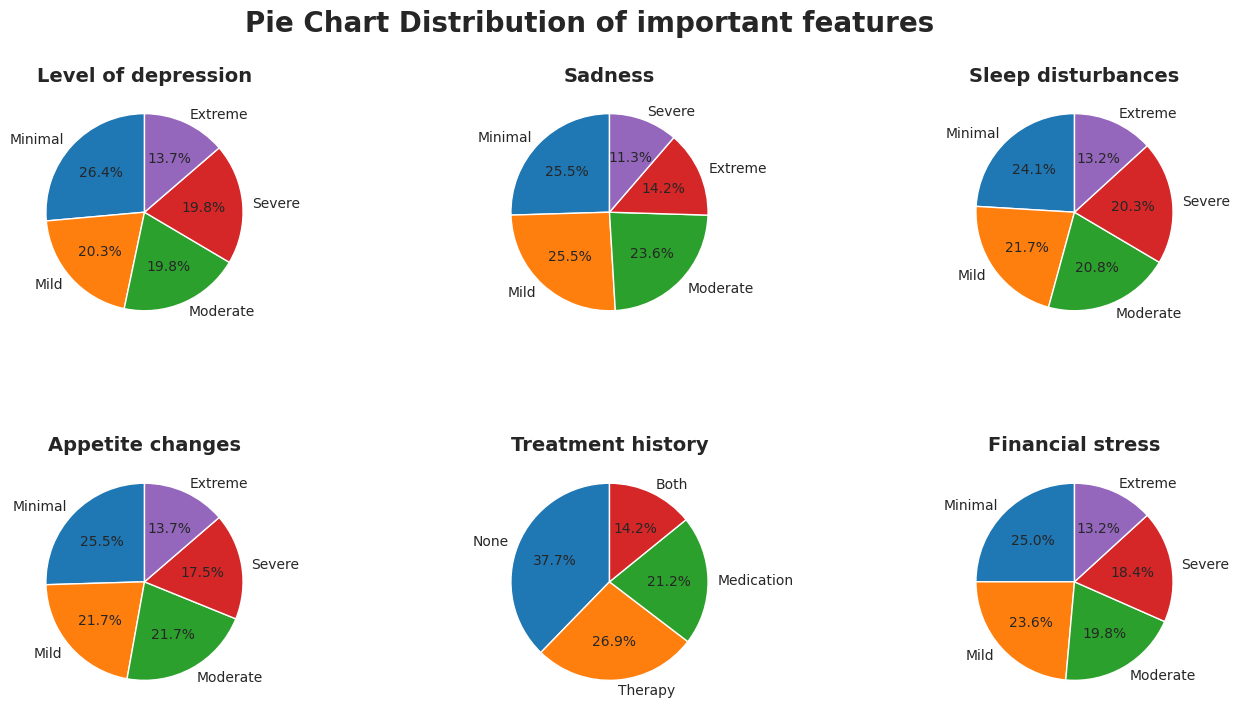

In [10]:

# Plot a pie chart using Seaborn

# Define data and labels

depression_labels = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']
sadness_labels = ['Minimal', 'Mild', 'Moderate', 'Extreme', 'Severe']
sleep_labels = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']
appetite_labels = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']
treatment_labels = ['None', 'Therapy', 'Medication', 'Both']
financial_labels = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']

depression_data = data['Level of depression'].value_counts().values
sadness_data = data['Sadness'].value_counts().values
sleep_data = data['Sleep disturbances'].value_counts().values
appetite_data = data['Appetite changes'].value_counts().values
treatment_data = data['Treatment history'].value_counts().values
financial_data = data['Financial stress'].value_counts().values

# Set figure size and style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Define subplot locations and titles
subplot_locs = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
subplot_titles = ['Level of depression', 'Sadness', 'Sleep disturbances', 'Appetite changes', 'Treatment history', 'Financial stress']

# Create pie charts in each subplot
for i in range(len(subplot_locs)):
    plt.subplot2grid((2, 3), subplot_locs[i])
    if i == 0:
        plt.pie(depression_data, labels=depression_labels, autopct='%1.1f%%', startangle=90)
    elif i == 1:
        plt.pie(sadness_data, labels=sadness_labels, autopct='%1.1f%%', startangle=90)
    elif i == 2:
        plt.pie(sleep_data, labels=sleep_labels, autopct='%1.1f%%', startangle=90)
    elif i == 3:
        plt.pie(appetite_data, labels=appetite_labels, autopct='%1.1f%%', startangle=90)
    elif i == 4:
        plt.pie(treatment_data, labels=treatment_labels, autopct='%1.1f%%', startangle=90)
    elif i == 5:
        plt.pie(financial_data, labels=financial_labels, autopct='%1.1f%%', startangle=90)
    plt.title(subplot_titles[i], fontsize=14, fontweight='bold')

# Adjust spacing between subplots and display figure
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('Pie Chart Distribution of important features', fontsize=20, fontweight='bold')
# plt.savefig("pie.png", dpi=300, bbox_inches="tight")
plt.show()

<ipython-input-11-be6bc64811db>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


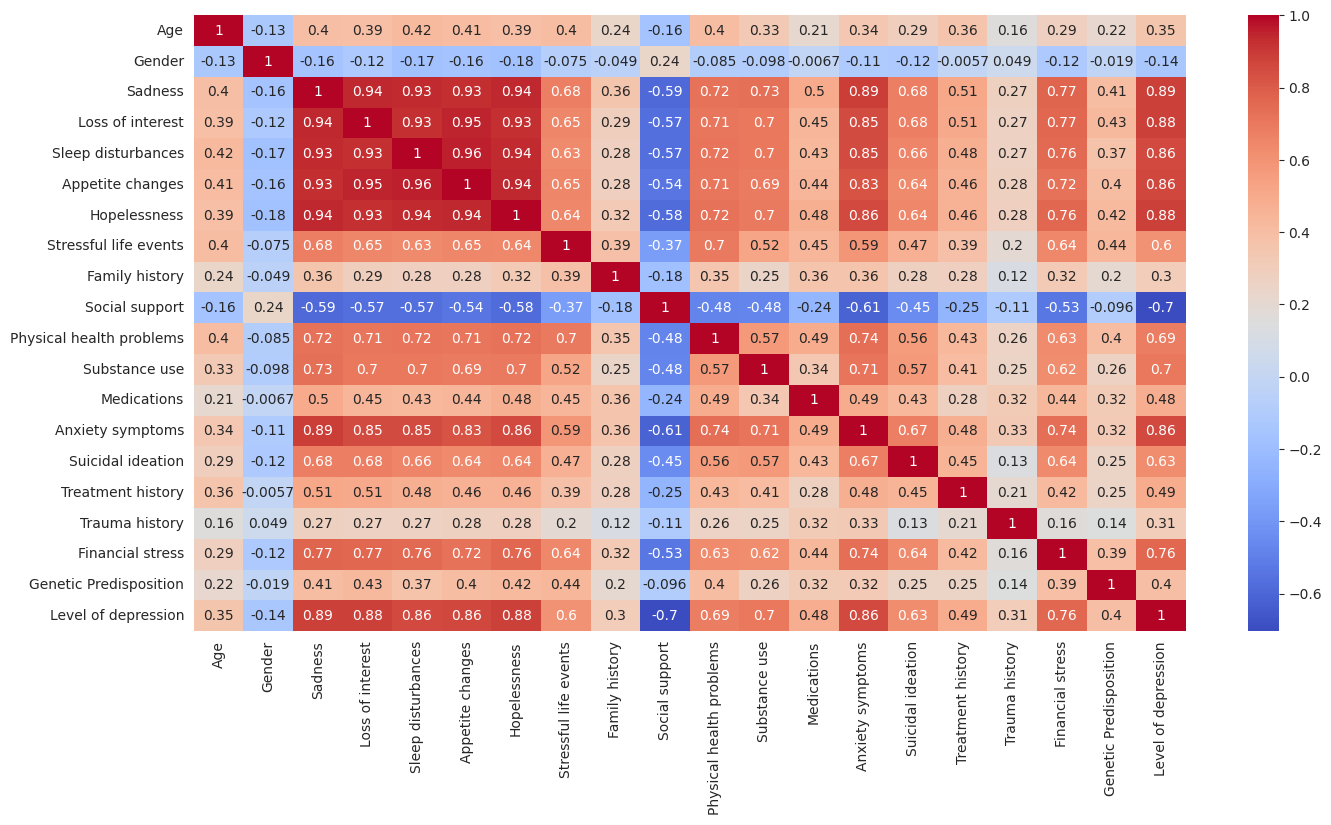

In [11]:

#Finding Correlation using pearson correlation
plt.figure(figsize=(16,8))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm') 
plt.show()

In [12]:
'''Features Selection '''
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    ln=len(corr_matrix.columns)
    for j in range(ln-1):
        if(corr_matrix.iloc[-1,j]<threshold and corr_matrix.iloc[-1,j]>0):
            colname=corr_matrix.columns[j]
            col_corr.add(colname)
    return col_corr

corr_features=correlation(data,0.4)
print("not useful features ",corr_features)
data=data.drop(columns=corr_features,axis=1) 

not useful features  {'Family history', 'Genetic Predisposition', 'Age', 'Trauma history'}


<ipython-input-12-77ecbd569736>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


In [13]:
X = data.iloc[:,2:-1]  # Input features
y = data['Level of depression']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=data['Anxiety symptoms'],random_state=2) 



# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

Confusion Matrix:
[[ 6  2  0  0  0]
 [ 0 14  1  0  0]
 [ 0  0  8  4  0]
 [ 1  0  1 14  2]
 [ 0  0  0  2  9]]


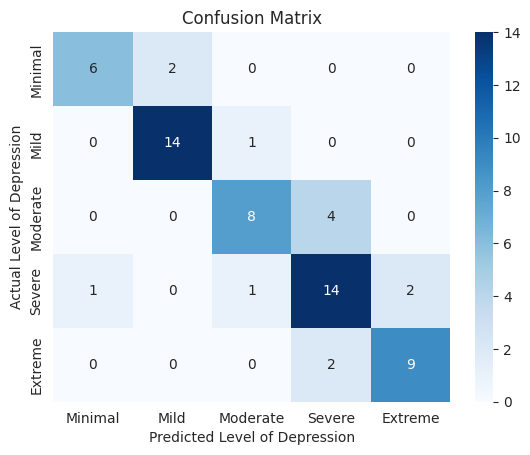

In [16]:

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)


x = ['Minimal', 'Mild', 'Moderate', 'Severe', 'Extreme']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x, yticklabels=x)
plt.xlabel('Predicted Level of Depression')
plt.ylabel('Actual Level of Depression')
plt.title('Confusion Matrix')
# plt.savefig("confusion.png", dpi=300, bbox_inches="tight")
plt.show()

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.75      0.80         8
         2.0       0.88      0.93      0.90        15
         3.0       0.80      0.67      0.73        12
         4.0       0.70      0.78      0.74        18
         5.0       0.82      0.82      0.82        11

    accuracy                           0.80        64
   macro avg       0.81      0.79      0.80        64
weighted avg       0.80      0.80      0.80        64



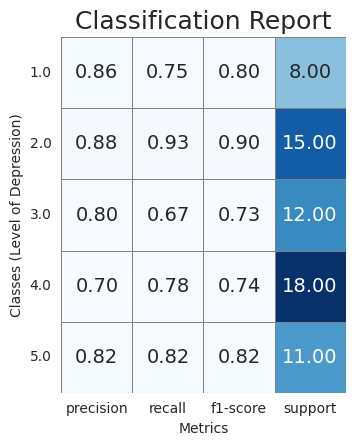

In [17]:
print("Classification Report:")
cr=classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))


# Define the function to plot the classification report
def plot_classification_report(cr, figsize=(6, 4)):
    report = cr
    report_df = pd.DataFrame(report).transpose()
    sns.heatmap(report_df.drop(['accuracy', 'macro avg', 'weighted avg']), annot=True, fmt='.2f', cmap='Blues', cbar=False, linewidths=0.5, linecolor='grey', square=True, annot_kws={'size': 14})
    sns.set(font_scale=1.5)
    plt.yticks(rotation=0)
    plt.title('Classification Report')
    plt.xlabel('Metrics')
    plt.ylabel('Classes (Level of Depression)')
    plt.tight_layout()
    # plt.savefig("classification_report.png", dpi=300, bbox_inches="tight")
    plt.show()

plot_classification_report(cr)
